En esta parte vamos a observar algunas visualizaciones en las que hemos visto mayor correlación.

In [2]:
#General

import numpy as np
import pandas as pd

#Visualizaciones

import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('C:/Users/peni_/Desktop/proyecto/Proyecto-Final-Bootcamp---Dream-Team/df_clean.csv')

Flitramos

In [3]:
# Filtrar columnas que no son necesarias para el EDA
df_filtered = df.drop(columns=['urls', 'timestamp', 'record_id','Titles'])

Separamos

In [4]:
def separar_columnas(df):
    columnas_categoricas = []
    columnas_continuas = []
    
    for columna in df.columns:
        if pd.api.types.is_numeric_dtype(df[columna]):
            columnas_continuas.append(columna)
        else:
            columnas_categoricas.append(columna)
    
    return columnas_categoricas, columnas_continuas

In [5]:
categoricas,continuas = separar_columnas(df_filtered)

In [6]:
df_categoricas = df[categoricas]

In [7]:
df_continuas = df[continuas]

Mapa de correlación con las columnas continuas

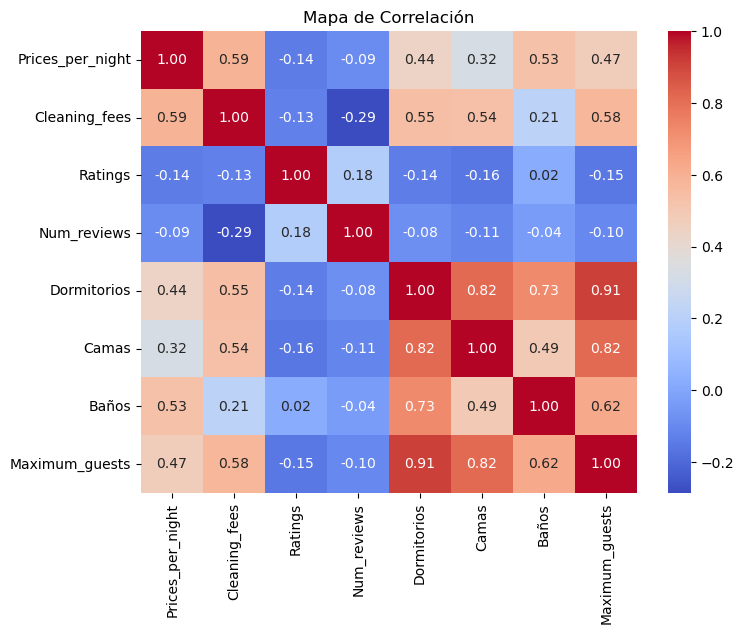

In [8]:
correlation_matrix = df_continuas.corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlación')
plt.show()

# Visualizaciones 

In [9]:
def eda_continuas(columnas, df, target="Prices_per_night", showfliers=True):
    for columna in columnas:
        # Histograma con KDE
        hist_fig = px.histogram(df, x=columna, marginal="violin", opacity=0.7,
                                 color_discrete_sequence=px.colors.sequential.Viridis,
                                 title=f"Histograma y KDE de {columna}")
        hist_fig.update_layout(showlegend=True)
        
        # Gráfico de dispersión
        scatter_fig = px.scatter(df, x=columna, y=target,
                                 color_discrete_sequence=px.colors.qualitative.Pastel,
                                 title=f"Gráfico de dispersión de {target} por {columna}")
        
        # Boxplot
        box_fig = go.Figure()
        for category in df[columna].unique():
            box_fig.add_trace(go.Box(
                y=df[df[columna] == category][target],
                name=str(category),
                boxpoints='outliers' if showfliers else False,
                marker_color=px.colors.qualitative.Pastel2[df[columna].unique().tolist().index(category) % len(px.colors.qualitative.Pastel2)]
            ))
        
        # Mostrar gráficos
        hist_fig.show()
        scatter_fig.show()
        box_fig.show()

In [10]:
def eda_categoricas(columnas, df, target="Prices_per_night", showfliers=True):
    for columna in columnas:
        # Gráfico de barras de conteo
        count_fig = px.histogram(df, x=columna, color=columna, title=f"Conteo de {columna}",
                                color_discrete_sequence=px.colors.qualitative.Pastel)

        # Gráfico de boxplot
        box_fig = go.Figure()
        for category in df[columna].unique():
            box_fig.add_trace(go.Box(
                y=df[df[columna] == category][target],
                name=str(category),
                boxpoints='outliers' if showfliers else False,
                marker_color=px.colors.qualitative.Pastel2[df[columna].unique().tolist().index(category) % len(px.colors.qualitative.Pastel2)]
            ))
        box_fig.update_layout(title=f"Boxplot de {target} por {columna}")

        # Mostrar gráficos
        count_fig.show()
        box_fig.show()

Vamos a analizar Price_per_nigth vs. Cleanin_fee

In [11]:
columnas_a_analizar = ['Cleaning_fees']
eda_continuas(columnas_a_analizar, df_continuas)

Aqui analizaremos Price_per_nigth vs. Dormitorios

In [12]:
columnas_a_analizar = ['Dormitorios']
eda_continuas(columnas_a_analizar, df_continuas)

Por ultimo Price_per_nigth vs. Property_Types

In [13]:
#Añadimos la columna Prices_per_night en este df para que podamos hacer la visualización.
df_categoricas['Prices_per_night'] = df_continuas['Prices_per_night']

C:\Users\peni_\AppData\Local\Temp\ipykernel_7688\273952360.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
columnas_a_analizar = ['Property_types']
eda_categoricas(columnas_a_analizar, df_categoricas)

### Intento graficar variables relacionadas - Diogo

In [13]:
### Grafica de Visualizacion entre Precio/Rating por tipo de alojamiento
price_rating_distribution = px.scatter(
    data_frame=df,
    x="Ratings",
    y="Prices_per_night",
    color="Property_types",
    opacity=0.7,
    title="Price and rating distribution by accomodation type",
    labels={"rating": "Rating", "price_per_night": "Price per night"},
)


price_rating_distribution.show()

In [23]:
# Grafica de Visualizacion entre Precio/Rating por tipo de alojamiento con Logaritmo
price_rating_distr_log = px.scatter(
    data_frame=df,
    x="Ratings",
    y="Prices_per_night",
    log_x=True,
    color="Property_types",
    title="Price and rating distribution by accomodation type (Log scale)",
    labels={"rating": "Rating (log scale)", "price_per_night": "Price per night"},
)

price_rating_distr_log.show()

In [22]:
# Plot the scatter plot with fixed 'price_per_night' column
reviews_rating_distribution = px.scatter(
    data_frame=df,
    x="Ratings",
    y="Num_reviews",
    log_x=True,
    color="Prices_per_night",
    title="Reviews and rating distribution by accomodation type (Log scale)",
    hover_name="Property_types",
    opacity=0.5,
    size="Prices_per_night",
    size_max=15,
)

reviews_rating_distribution.show()

In [24]:
df.columns

Index(['urls', 'timestamp', 'record_id', 'Titles', 'Host_name',
       'Property_types', 'Prices_per_night', 'Check_ins', 'Check_outs',
       'Cleaning_fees', 'Location', 'Ratings', 'Num_reviews', 'Dormitorios',
       'Camas', 'Baños', 'Maximum_guests'],
      dtype='object')